# DATA CLEANING

In [18]:

# Import Python libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# import csv file
df= pd.read_csv(r'C:\Users\rabik\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding = 'unicode_escape')

In [26]:
df.shape

(11251, 15)

df.head()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [44]:
#drop unrelated/blank columns
df.drop( [ 'Status', 'unnamed1'], axis =1 , inplace =True)

In [50]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [90]:
# drop null values
df.dropna(inplace=True)

In [94]:
pd.isnull(df).sum()


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [102]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [112]:
df['Amount'].dtype

dtype('int32')

In [116]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [118]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [126]:
# use describe() for specific columns
df[['Age']].describe()

,Age
count,11239.000000
mean,35.410357
std,12.753866
min,12.000000
25%,27.000000
50%,33.000000
75%,43.000000
max,92.000000


# EDA ANALYSIS

GENDER

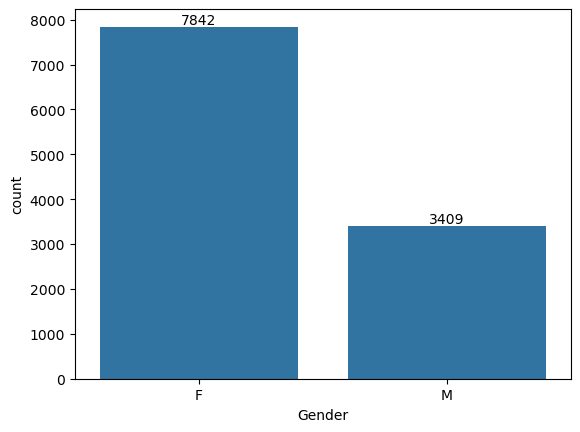

In [10]:
# plotting a bar chart for Gender and it's count
ax = sns.countplot(x='Gender',data =df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

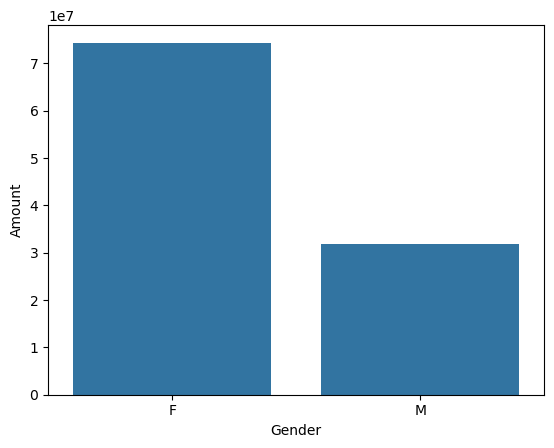

In [12]:
# plotting a bar chart for gender vs total amount
sales_gender=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot( x= 'Gender', y= 'Amount', data=sales_gender)

Age

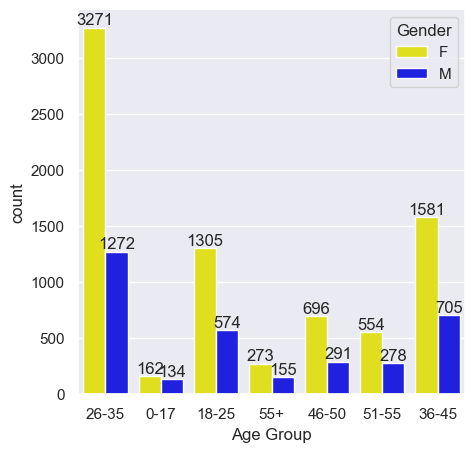

In [63]:
ax=sns.countplot( x= 'Age Group', hue= 'Gender', data=df,palette=['yellow', 'blue'])
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

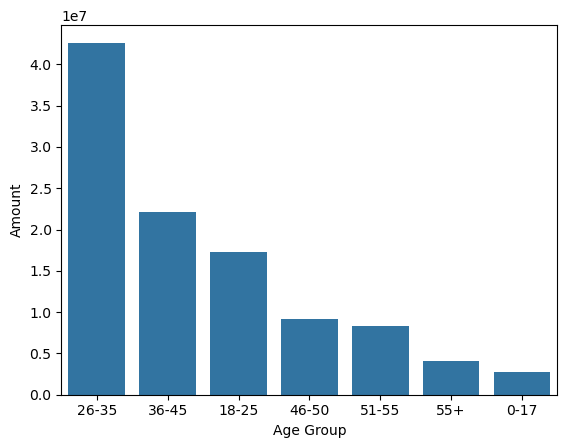

In [43]:
# Total Amount vs Age Group
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by ='Amount', ascending =False)
sns.barplot(x='Age Group', y='Amount', data=sales_age ) 

<Axes: xlabel='State', ylabel='Orders'>

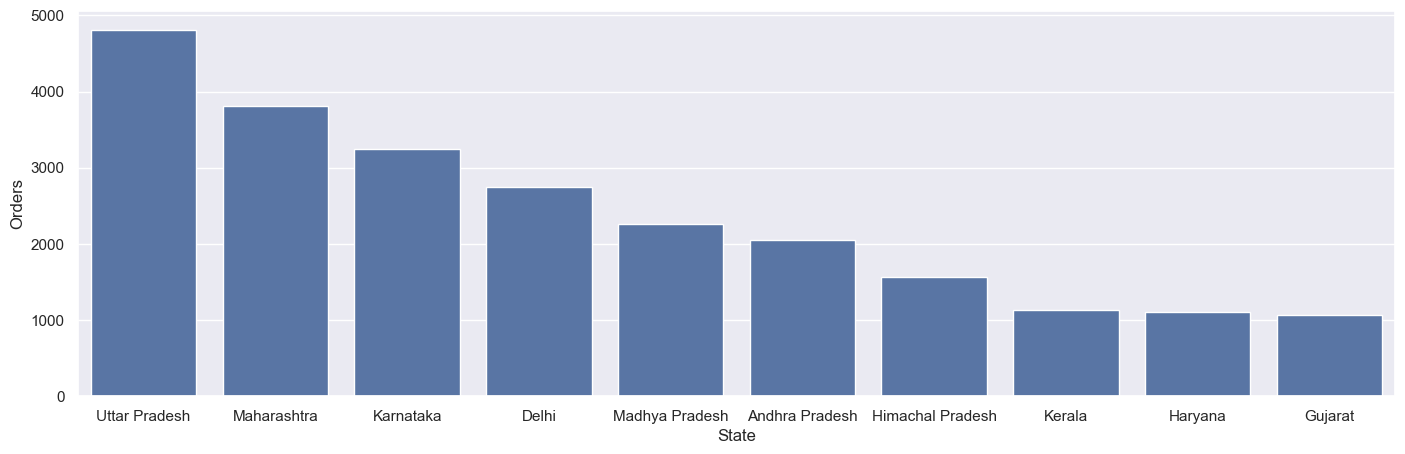

In [86]:
# total number of orders from top 10 states
sales_states= df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by= 'Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x='State', y='Orders', data=sales_states) 

Occupation

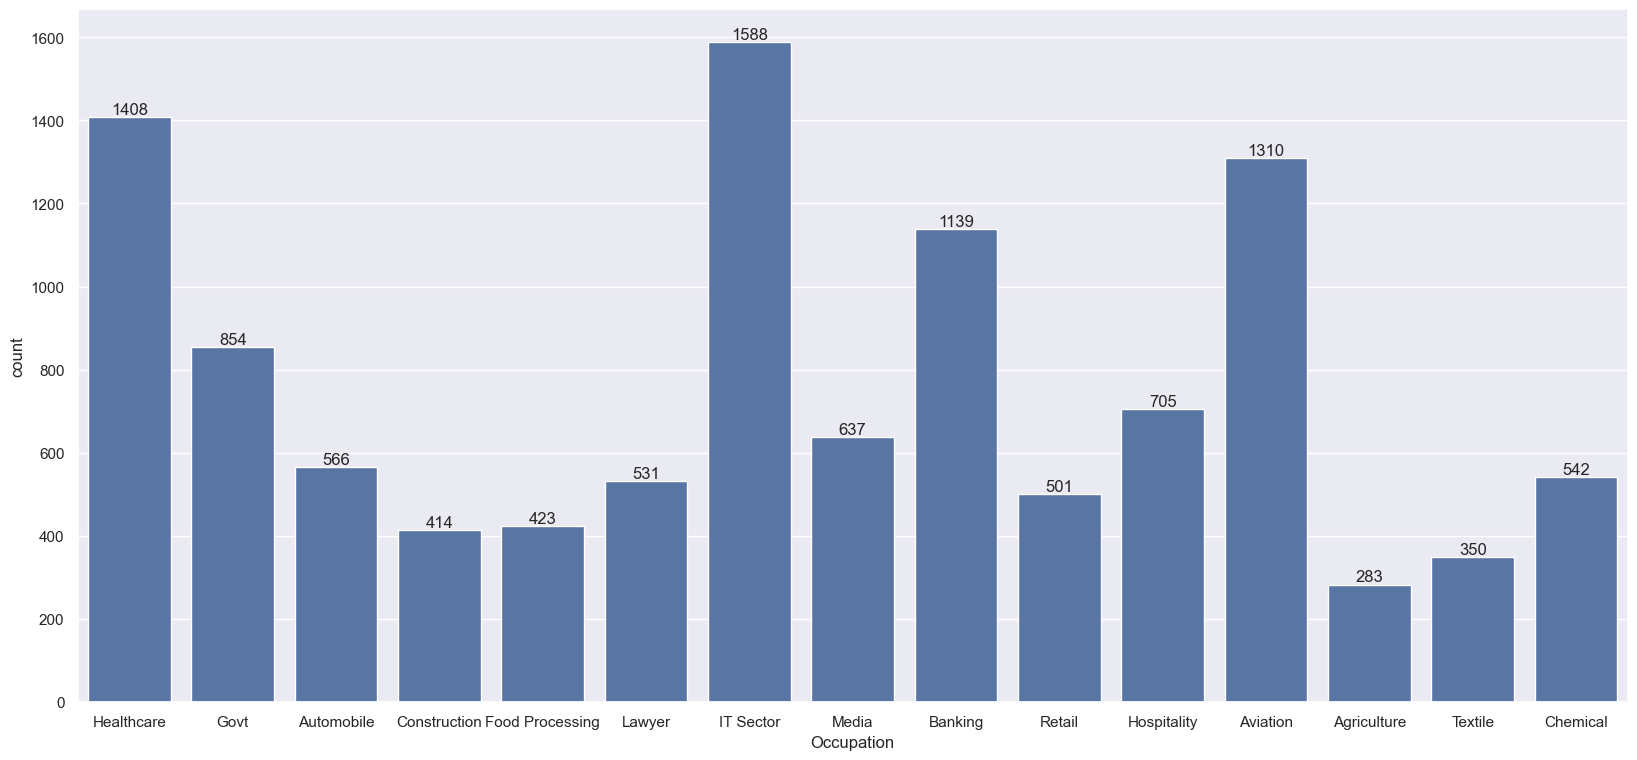

In [90]:
ax=sns.countplot( x= 'Occupation', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(20,9)})

<Axes: xlabel='Occupation', ylabel='Amount'>

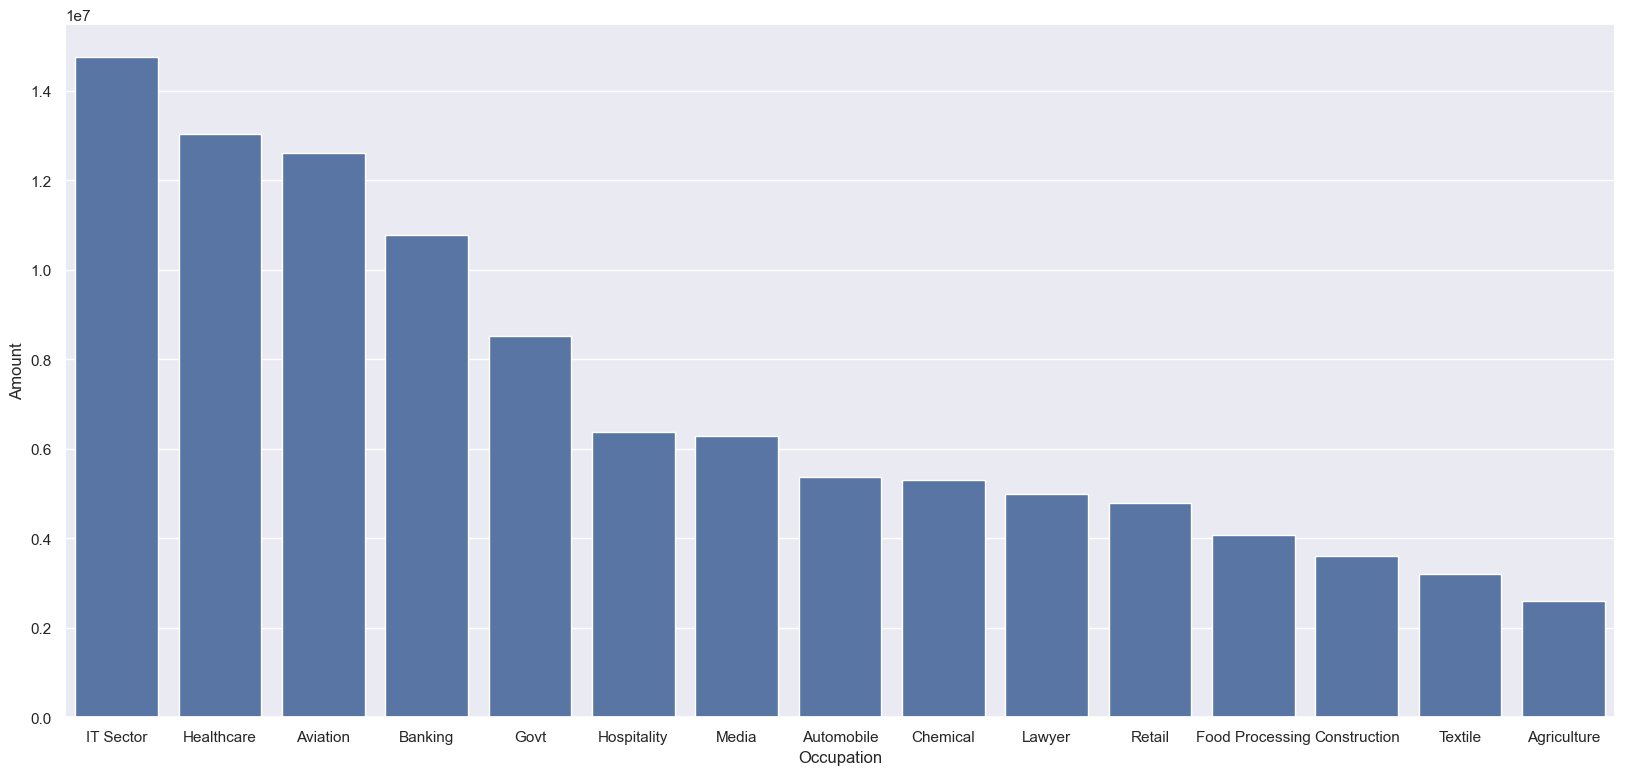

In [94]:
sales_occu= df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Occupation',y='Amount', data=sales_occu)

Product Category

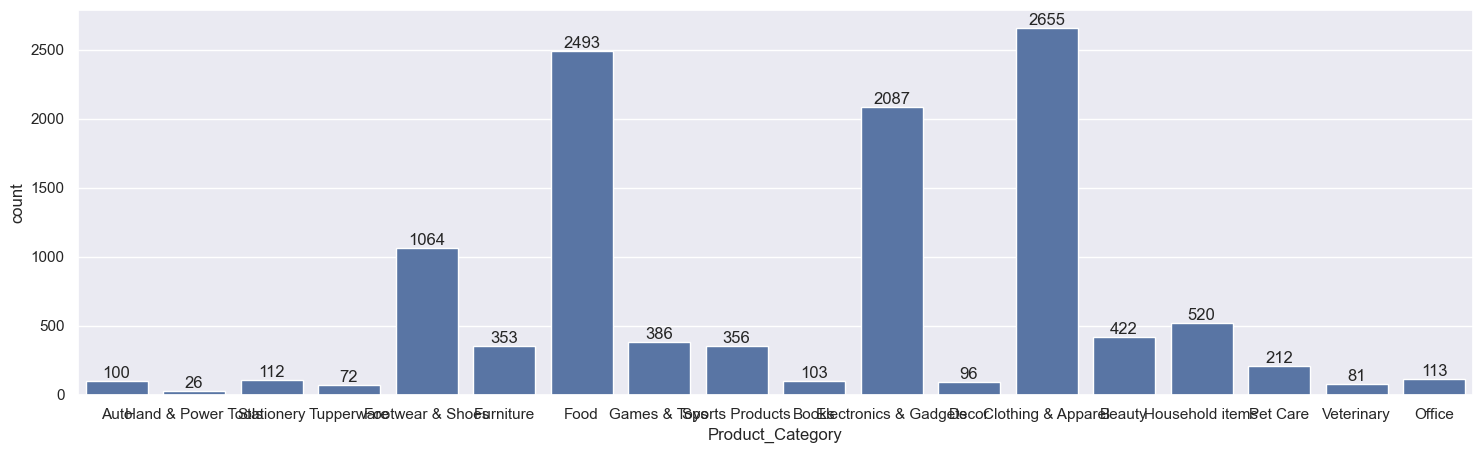

In [141]:
ax=sns.countplot(x='Product_Category', data=df)
for bars in ax.containers:
   ax.bar_label(bars)
sns.set(rc={'figure.figsize':(18,5)}) 

<Axes: xlabel='Product_Category', ylabel='Amount'>

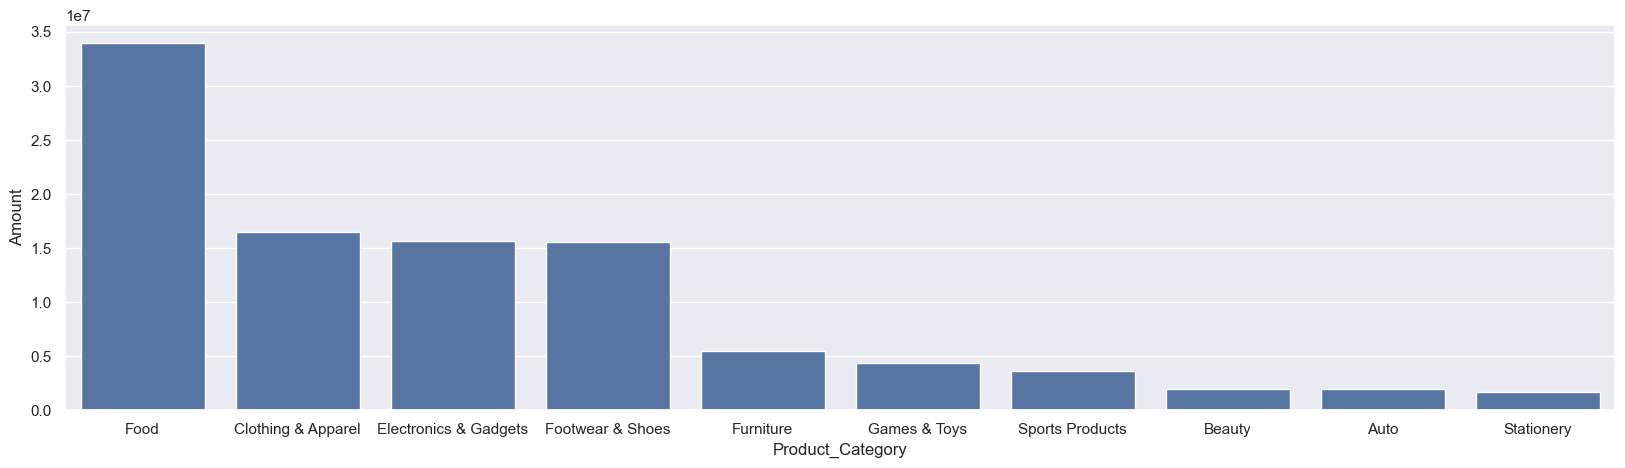

In [26]:
sale_prod= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sale_prod, x= 'Product_Category', y='Amount')

Martial Status 

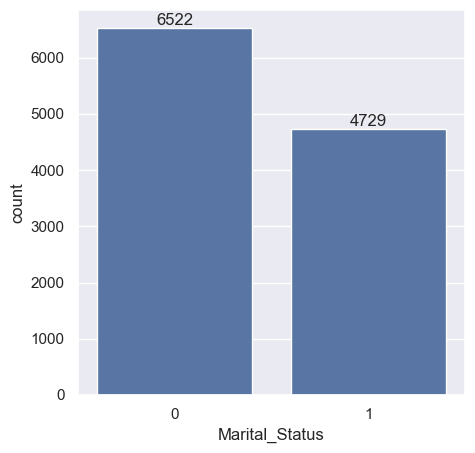

In [55]:
ax=sns.countplot(data= df, x= 'Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

sns.set(rc={'figure.figsize':(5,5)})

<Axes: xlabel='Marital_Status', ylabel='Amount'>

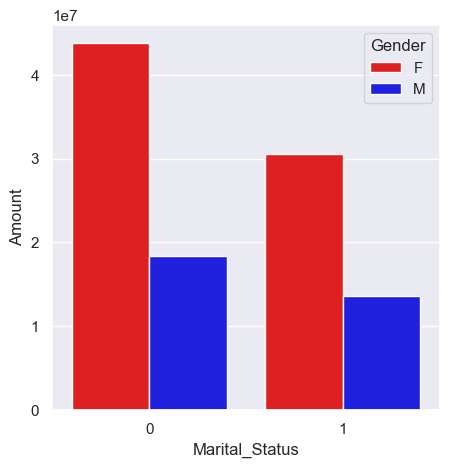

In [59]:
Gen_sale=df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False)
sns.barplot(data= Gen_sale, x='Marital_Status', y='Amount',hue='Gender',palette=['red', 'blue'])

# CONCLUSION

Married women aged 26-35 from Uttar Pradesh, Maharashtra, and Karnataka, particularly those employed in IT, healthcare, and aviation sectors, demonstrate a higher propensity to purchase products from the food, clothing, and electronics categories.